In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import warnings

In [2]:
warnings.filterwarnings('ignore')

## Чтение данных

In [3]:
data = pd.read_csv('.\data\images.csv')

In [4]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
def show_image(image_data, ax=None):
    image = image_data.reshape(28, 28).astype('uint8')

    if ax is None:
        plt.imshow(image)
    else:
        ax.axis('off')
        ax.imshow(image)

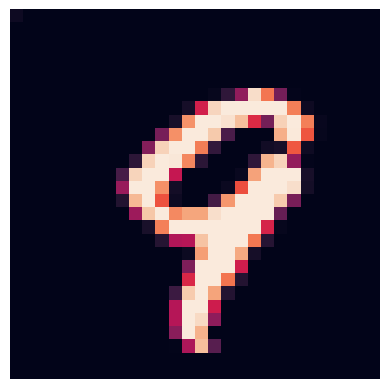

In [6]:
show_image(data.values[33, :-1], ax=plt)

In [7]:
def show_random_numbs(numbs, quantity, data, *, cell_size_x = 12, cell_size_y = 10):
    fig, axs = plt.subplots(len(numbs), quantity, figsize=(cell_size_x, cell_size_y), sharex=True, sharey=True)

    group_n = 0
    for numb, group in data.groupby('label'):
        if numb not in numbs:
            continue

        random_numbers = group.sample(quantity).drop(columns='label')
        image_vects = [x.values for _, x in random_numbers.iterrows()]

        image_n = 0
        for image in image_vects:
            show_image(image, ax=axs[group_n][image_n])
            image_n += 1

        group_n += 1

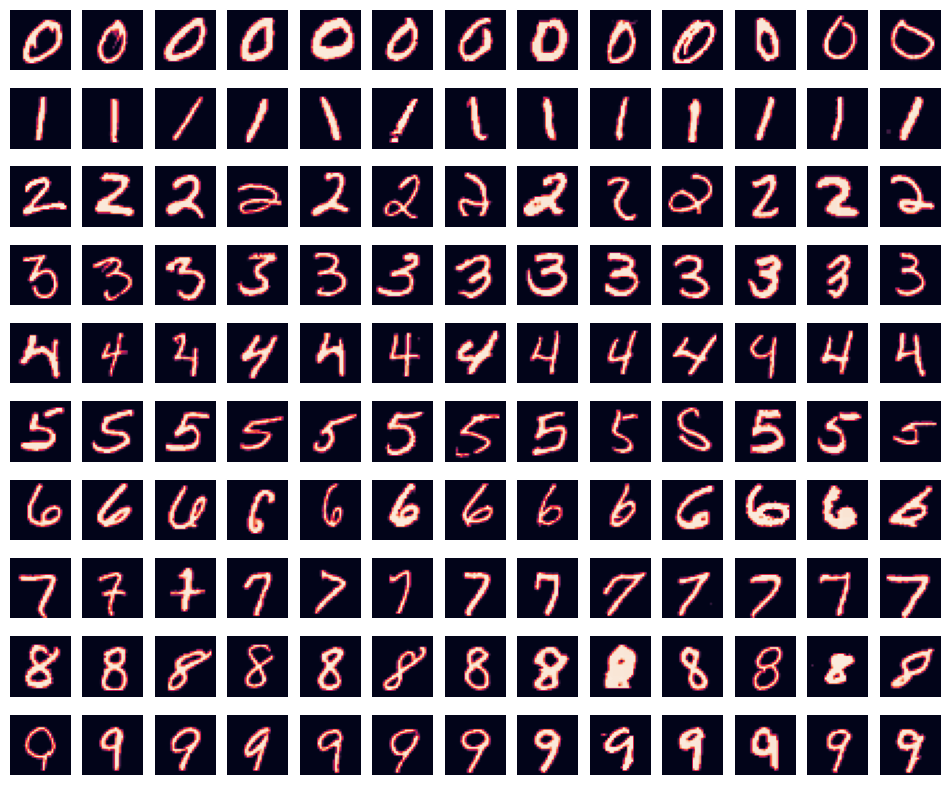

In [8]:
show_random_numbs(range(0, 10), 13, data)

In [83]:
X = data.drop(columns='label')
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Подготовка факторов

In [10]:
description = X_train.describe()

In [11]:
description

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,...,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.0,33600.0,33600.0,33600.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.251488,0.123006,0.050119,0.014881,0.013631,0.001726,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.830785,4.790478,2.967655,1.548107,1.643244,0.316416,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,58.000000,0.0,0.0,0.0,0.0


<Axes: >

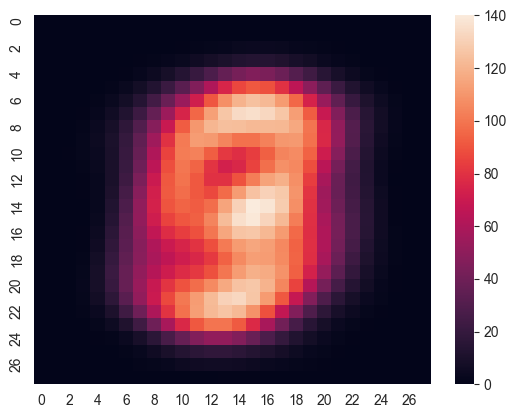

In [12]:
sns.heatmap(pd.DataFrame(description.loc['mean'].values.reshape(28, 28).round(2)))

<Axes: >

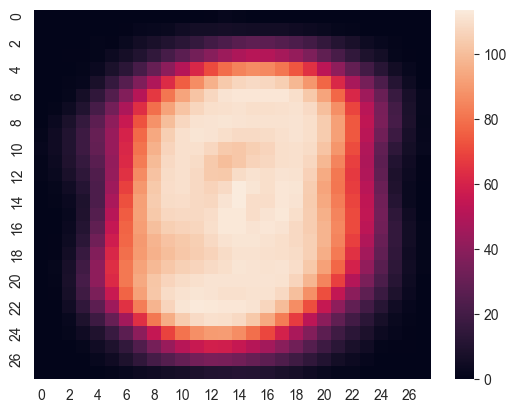

In [13]:
sns.heatmap(pd.DataFrame(description.loc['std'].values.reshape(28, 28).round(2)))

In [14]:
pixel_selector = VarianceThreshold(threshold=0)
pixel_selector.fit(X_train)

VarianceThreshold(threshold=0)

In [88]:
pixel_selector.transform(X_train)
important_pixel_names = pixel_selector.get_feature_names_out()
print(type(important_pixel_names))
print(important_pixel_names)
important_pixel_names

<class 'numpy.ndarray'>
['pixel12' 'pixel13' 'pixel14' 'pixel15' 'pixel32' 'pixel33' 'pixel34'
 'pixel35' 'pixel36' 'pixel37' 'pixel38' 'pixel39' 'pixel40' 'pixel41'
 'pixel42' 'pixel43' 'pixel44' 'pixel45' 'pixel46' 'pixel47' 'pixel48'
 'pixel49' 'pixel50' 'pixel51' 'pixel58' 'pixel59' 'pixel60' 'pixel61'
 'pixel62' 'pixel63' 'pixel64' 'pixel65' 'pixel66' 'pixel67' 'pixel68'
 'pixel69' 'pixel70' 'pixel71' 'pixel72' 'pixel73' 'pixel74' 'pixel75'
 'pixel76' 'pixel77' 'pixel78' 'pixel79' 'pixel80' 'pixel81' 'pixel86'
 'pixel87' 'pixel88' 'pixel89' 'pixel90' 'pixel91' 'pixel92' 'pixel93'
 'pixel94' 'pixel95' 'pixel96' 'pixel97' 'pixel98' 'pixel99' 'pixel100'
 'pixel101' 'pixel102' 'pixel103' 'pixel104' 'pixel105' 'pixel106'
 'pixel107' 'pixel108' 'pixel109' 'pixel110' 'pixel113' 'pixel114'
 'pixel115' 'pixel116' 'pixel117' 'pixel118' 'pixel119' 'pixel120'
 'pixel121' 'pixel122' 'pixel123' 'pixel124' 'pixel125' 'pixel126'
 'pixel127' 'pixel128' 'pixel129' 'pixel130' 'pixel131' 'pixel132'
 

array(['pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel32', 'pixel33',
       'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39',
       'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45',
       'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51',
       'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63',
       'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69',
       'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75',
       'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81',
       'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91',
       'pixel92', 'pixel93', 'pixel94', 'pixel95', 'pixel96', 'pixel97',
       'pixel98', 'pixel99', 'pixel100', 'pixel101', 'pixel102',
       'pixel103', 'pixel104', 'pixel105', 'pixel106', 'pixel107',
       'pixel108', 'pixel109', 'pixel110', 'pixel113', 'pixel114',
       'pixel115', 'pixel116', 'pixel117', 'pixel118', 'pixel119',
    

In [16]:
X_train = X_train[important_pixel_names]
X_train

,pixel12,pixel13,pixel14,pixel15,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,...,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779
21278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38717,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32511,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Создание модели

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [18]:
seed = 1
size_validation = 0.2

In [99]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=size_validation, random_state=seed)

### Дерево принятий решений

In [96]:
model_decision_tree = DecisionTreeClassifier(min_samples_leaf=5, criterion='gini', random_state=seed)

In [97]:
%%time
model_decision_tree.fit(X_train, y_train)

CPU times: total: 11.3 s
Wall time: 11.9 s


DecisionTreeClassifier(min_samples_leaf=5, random_state=1)

In [100]:
model_decision_tree.score(X_validation, y_validation)

0.9367559523809523

In [23]:
def greed_search_solution(min_samples_leaf, x_train, y_train, x_val, y_val, random_state, criterion='gini'):
    best_score = -1
    best_param = -1
    for param in min_samples_leaf:
        model = DecisionTreeClassifier(min_samples_leaf=param, criterion=criterion, random_state=random_state)
        model.fit(x_train, y_train)
        res = model.score(x_val, y_val)

        if best_score < res:
            best_score = res
            best_param = param

    return best_param, best_score

In [24]:
%%time

model_configs = [1, 3, 5, 100]
best_param, best_score = greed_search_solution(model_configs, X_train, y_train, X_validation, y_validation, seed)
print('best min leaf: {} with best_score {}'.format(best_param, best_score))

best min leaf: 5 with best_score 0.856845238095238
CPU times: total: 29.4 s
Wall time: 29.4 s


### Случайный лес

In [25]:
model_random_forest = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, max_features=int(len(X_train.columns) ** (1/2)), criterion='gini')

In [26]:
%%time
model_random_forest.fit(X_train, y_train)

CPU times: total: 25.7 s
Wall time: 25.7 s


RandomForestClassifier(max_features=26)

In [27]:
%%time
model_random_forest.score(X_validation, y_validation)

CPU times: total: 312 ms
Wall time: 290 ms


0.9619047619047619

In [33]:
y_predict = model_random_forest.predict(X_validation)

In [34]:
precision_score(y_validation, y_predict, average='micro')

0.9619047619047619

In [35]:
precision_score(y_validation, y_predict, average='macro')

0.9615564518560145

In [36]:
X_err = X_validation[y_predict != y_validation]
y_err = y_validation[y_predict != y_validation]

In [37]:
X_err['y'] = y_err
X_err['y_pred'] = y_predict[y_predict != y_validation]

In [38]:
X_err \
    .groupby(['y', 'y_pred'], as_index=False) \
    .agg({'pixel32' : 'count'}) \
    .rename(columns={'pixel32' : 'count_err'}) \
    .sort_values('count_err', ascending=False)

,y,y_pred,count_err
49,7,9,17
17,3,2,16
61,9,4,14
32,5,3,12
60,9,3,10
...,...,...,...
25,4,2,1
39,6,2,1
27,4,7,1
33,5,4,1


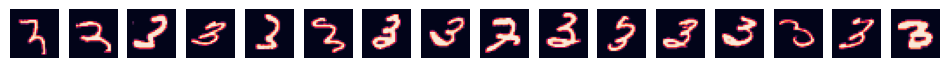

In [39]:
df = X_err[(X_err['y'] == 3) & (X_err['y_pred'] == 2)] \
    .drop(columns=['y_pred', 'y'])

fig, axs = plt.subplots(1, len(df), figsize=(12,10), sharex=True, sharey=True)

image_n = 0
for ind, image_row in df.iterrows():
    inds_of_pixels = [int(x[5:]) for x in df.columns]
    image = np.array([(image_row['pixel' + str(i)] if i in inds_of_pixels else 0) for i in range(784)])

    show_image(image, ax=axs[image_n])
    image_n += 1

## Оценка качества модели

In [95]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})

In [64]:
X_test = X_test[important_pixel_names]

In [65]:
%%time
model_random_forest.score(X_test, y_test)

CPU times: total: 391 ms
Wall time: 368 ms


0.9641666666666666

In [68]:
%%time

boot_accuracies, boot_precisions, boot_recalls = [], [], []

X_y_test = X_test.copy(deep=True)
X_y_test['y'] = y_test

for i in range(1000):
    X_y_test_boot = X_y_test.sample(len(X_y_test), replace=True)
    X_test_boot = X_y_test_boot.drop(columns='y')
    y_test_boot = X_y_test_boot['y']

    y_pred = model_random_forest.predict(X_test_boot)

    boot_accuracies.append(accuracy_score(y_test_boot, y_pred))
    boot_precisions.append(precision_score(y_test_boot, y_pred, average='micro'))
    boot_recalls.append(recall_score(y_test_boot, y_pred, average='micro'))

CPU times: total: 6min
Wall time: 6min 2s


<Axes: ylabel='Count'>

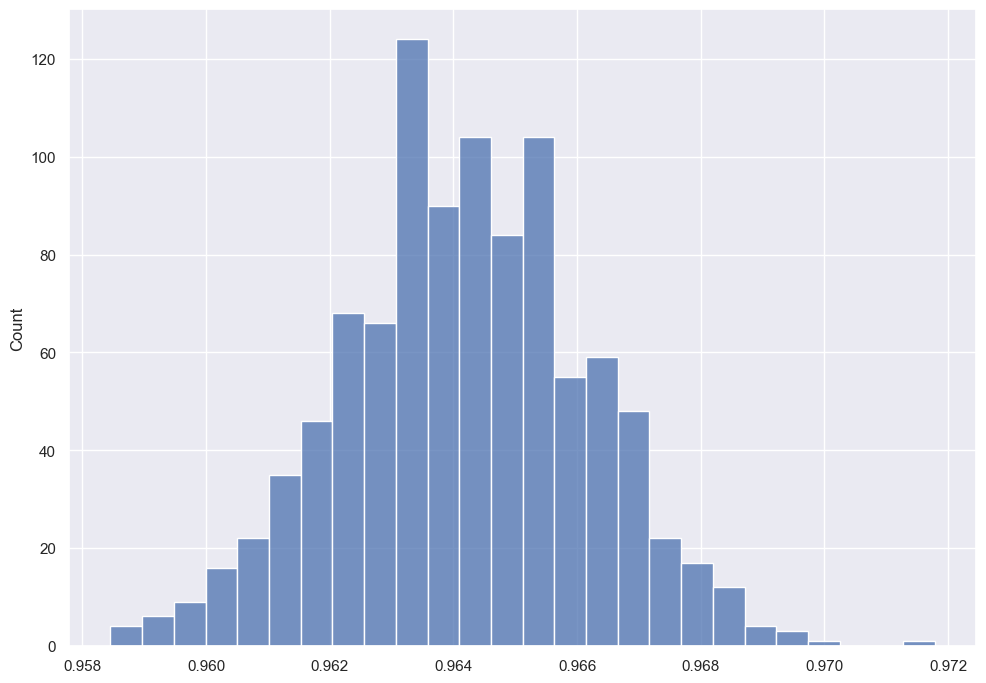

In [69]:
sns.histplot(boot_accuracies)

In [70]:
boot_accuracies_sorted = list(sorted(boot_accuracies))
boot_accuracies_sorted = boot_accuracies_sorted[25:975]

print('Доверительный интервал для accuracy: ({}, {})'.format(round(boot_accuracies_sorted[0], 3), round(boot_accuracies_sorted[-1], 3)))

Доверительный интервал для accuracy: (0.96, 0.968)


In [71]:
boot_precisions_sorted = list(sorted(boot_precisions))
boot_precisions_sorted = boot_precisions_sorted[25:975]

print('Доверительный интервал для precision: ({}, {})'.format(round(boot_precisions_sorted[0], 3), round(boot_precisions_sorted[-1], 3)))

Доверительный интервал для precision: (0.96, 0.968)


In [72]:
boot_recalls_sorted = list(sorted(boot_recalls))
boot_recalls_sorted = boot_recalls_sorted[25:975]

print('Доверительный интервал для recall: ({}, {})'.format(round(boot_recalls_sorted[0], 3), round(boot_recalls_sorted[-1], 3)))

Доверительный интервал для recall: (0.96, 0.968)


## Интерпретация результатов

In [105]:
model_decision_tree.feature_importances_[model_decision_tree.feature_importances_ > 0]

array([1.67241793e-03, 1.89862802e-02, 1.19733913e-03, 1.43046213e-05,
       3.20240407e-05, 1.43013344e-04, 1.33339115e-04, 1.42528680e-05,
       5.44477367e-03, 5.64059403e-05, 2.16877741e-04, 1.16957516e-04,
       1.89046530e-04, 3.89597000e-04, 5.08814027e-05, 1.88590095e-05,
       5.85176226e-06, 2.95440881e-04, 9.43438712e-04, 2.66350745e-04,
       2.50307415e-04, 2.03327243e-04, 2.93388983e-04, 3.83476075e-04,
       3.19751879e-04, 4.39038612e-03, 6.02370048e-04, 5.22523035e-03,
       1.19581143e-04, 9.30776412e-04, 4.76375149e-02, 2.21463348e-04,
       8.76234326e-04, 9.12929559e-04, 1.21285369e-03, 1.18501281e-05,
       2.65373333e-05, 1.82024900e-04, 5.20330350e-05, 1.38037139e-05,
       3.79446937e-04, 8.75583919e-04, 2.62398520e-03, 8.62015251e-04,
       1.35122458e-03, 3.02164494e-03, 2.54166324e-03, 1.03753583e-02,
       1.15386796e-03, 1.01310456e-03, 2.05781495e-03, 1.10308634e-03,
       5.14024439e-04, 1.21504146e-03, 3.37689328e-03, 4.94737446e-05,
      

In [106]:
model_decision_tree.feature_names_in_[model_decision_tree.feature_importances_ > 0]

array(['pixel93', 'pixel96', 'pixel97', 'pixel99', 'pixel100', 'pixel101',
       'pixel102', 'pixel103', 'pixel104', 'pixel107', 'pixel121',
       'pixel122', 'pixel123', 'pixel124', 'pixel126', 'pixel127',
       'pixel128', 'pixel129', 'pixel130', 'pixel131', 'pixel132',
       'pixel133', 'pixel146', 'pixel148', 'pixel149', 'pixel150',
       'pixel151', 'pixel152', 'pixel153', 'pixel154', 'pixel155',
       'pixel156', 'pixel157', 'pixel158', 'pixel159', 'pixel161',
       'pixel162', 'pixel163', 'pixel174', 'pixel175', 'pixel176',
       'pixel177', 'pixel178', 'pixel179', 'pixel180', 'pixel181',
       'pixel182', 'pixel183', 'pixel184', 'pixel185', 'pixel186',
       'pixel187', 'pixel188', 'pixel189', 'pixel191', 'pixel192',
       'pixel200', 'pixel201', 'pixel202', 'pixel204', 'pixel205',
       'pixel206', 'pixel207', 'pixel208', 'pixel209', 'pixel210',
       'pixel211', 'pixel212', 'pixel213', 'pixel214', 'pixel215',
       'pixel216', 'pixel217', 'pixel218', 'pixel219',

<Axes: ylabel='Count'>

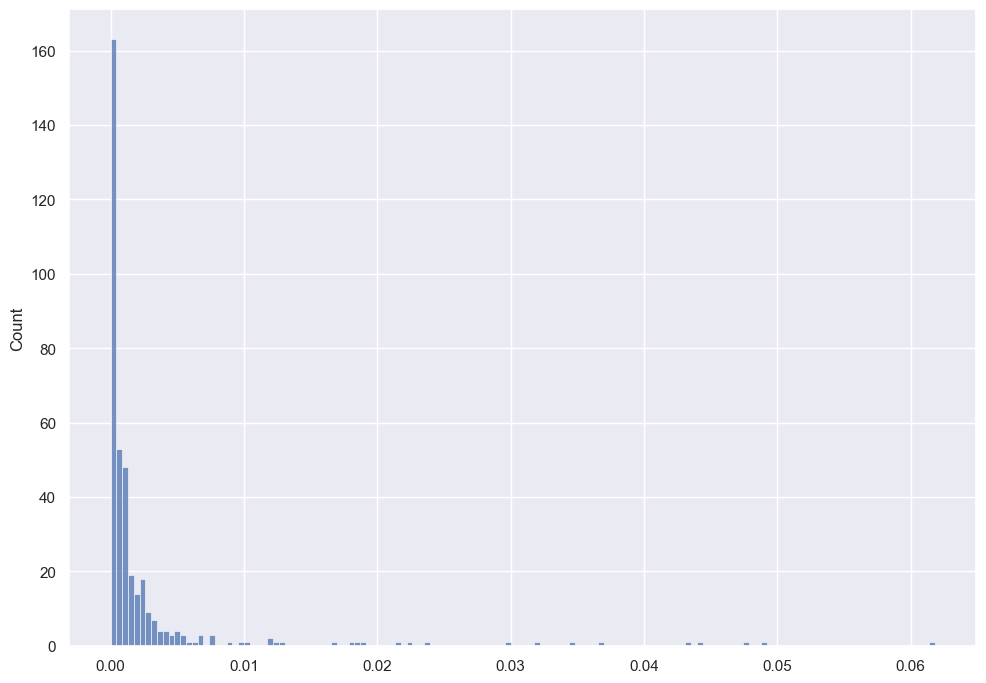

In [107]:
sns.histplot(model_decision_tree.feature_importances_[model_decision_tree.feature_importances_ > 0])

In [108]:
model_decision_tree.feature_names_in_[model_decision_tree.feature_importances_ > 0.01]

array(['pixel96', 'pixel155', 'pixel183', 'pixel239', 'pixel245',
       'pixel270', 'pixel296', 'pixel322', 'pixel351', 'pixel375',
       'pixel377', 'pixel409', 'pixel431', 'pixel434', 'pixel455',
       'pixel485', 'pixel488', 'pixel515', 'pixel550', 'pixel569',
       'pixel657'], dtype=object)

In [120]:
most_significant_pixels = model_decision_tree.feature_names_in_[model_decision_tree.feature_importances_ > 0.01]

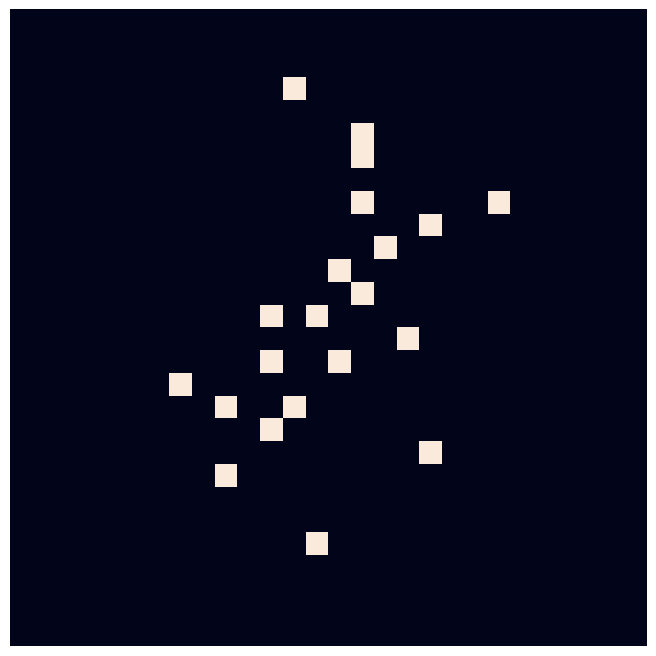

In [121]:
most_significant_pixels_data = [ int(value[5:]) for value in most_significant_pixels]
most_significant_pixels_data = np.array([(255 if value in most_significant_pixels_data else 0) for value in range(784)])

show_image(most_significant_pixels_data, ax=plt)

In [122]:
advanced_model_decision_tree = DecisionTreeClassifier(min_samples_leaf=5, criterion='gini', random_state=seed)

In [123]:
X_train = X_train[most_significant_pixels]

In [124]:
advanced_model_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=5, random_state=1)

In [126]:
X_test = X_test[most_significant_pixels]
advanced_model_decision_tree.score(X_test, y_test)

0.8120238095238095